https://gglasso.readthedocs.io/en/latest/index.html

In [1]:
# !pip install gglasso

In [2]:
# !pip install decorator==5.0.9

# Importing Libraries

In [3]:
from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import pandas as pd


In [4]:
import numpy as np
from sklearn.covariance import GraphicalLasso


# Importing Dataset

In [5]:
cars = pd.read_csv("/Users/pushpamahendra/Praxis Business School-Pushpa’s MacBook Air/r studio/cars.csv")

In [6]:
X = cars[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration']]

In [7]:
# X= preprocessing.scale(X)

# Sklearn Package

In [8]:
cov = GraphicalLasso(alpha=0.6210169418915615).fit(X)

In [9]:
cov.precision_

array([[ 3.88537960e-02,  0.00000000e+00,  3.06303652e-04,
         1.48356332e-03,  2.08414110e-04, -0.00000000e+00],
       [ 0.00000000e+00,  3.42541982e+00, -4.88140426e-02,
         0.00000000e+00, -5.57403882e-04,  0.00000000e+00],
       [ 3.06303652e-04, -4.88140426e-02,  1.64692636e-03,
        -4.16669231e-04, -7.66006558e-05,  4.34621569e-03],
       [ 1.48356332e-03,  0.00000000e+00, -4.16669231e-04,
         3.81016527e-03, -6.80239843e-05,  1.79152316e-02],
       [ 2.08414110e-04, -5.57403882e-04, -7.66006558e-05,
        -6.80239843e-05,  1.44593591e-05, -8.13229833e-04],
       [-0.00000000e+00,  0.00000000e+00,  4.34621569e-03,
         1.79152316e-02, -8.13229833e-04,  2.87439716e-01]])

In [10]:
sklearn_result = cov.precision_

# GGlasso Package

In [11]:
# Covariance matrix
Sigma = np.cov(X.T)
Sigma.shape

(6, 6)

In [12]:
N = X.shape[0]
N

406

In [13]:
# inverse-covariance matrix
Theta = np.linalg.inv(Sigma)
Theta,Theta.shape

(array([[ 3.89088743e-02,  1.11395778e-02,  1.02330727e-04,
          1.39549600e-03,  2.12328097e-04, -2.46015954e-03],
        [ 1.11395778e-02,  3.66461696e+00, -5.48285818e-02,
          8.73745965e-03, -5.22352524e-04,  2.83936489e-02],
        [ 1.02330727e-04, -5.48285818e-02,  1.77265731e-03,
         -5.34083007e-04, -7.74765554e-05,  4.06157371e-03],
        [ 1.39549600e-03,  8.73745965e-03, -5.34083007e-04,
          3.89393669e-03, -7.31758380e-05,  1.87385168e-02],
        [ 2.12328097e-04, -5.22352524e-04, -7.74765554e-05,
         -7.31758380e-05,  1.46482275e-05, -8.72745901e-04],
        [-2.46015954e-03,  2.83936489e-02,  4.06157371e-03,
          1.87385168e-02, -8.72745901e-04,  2.95581464e-01]]),
 (6, 6))

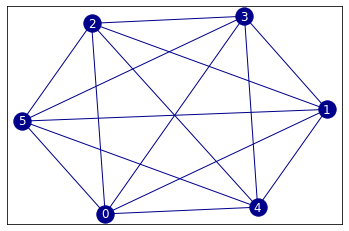

In [14]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

In [15]:
A

array([[0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0]])

In [16]:
P = glasso_problem(Sigma, N, reg_params = {'lambda1': 0.6210169418915615}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.6210169418915615, 'mu1': None}


In [17]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.1)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 875 iterations with status: optimal.
ADMM terminated after 786 iterations with status: optimal.
ADMM terminated after 546 iterations with status: optimal.
ADMM terminated after 456 iterations with status: optimal.
ADMM terminated after 410 iterations with status: optimal.
ADMM terminated after 365 iterations with status: optimal.
ADMM terminated after 389 iterations with status: optimal.
ADMM terminated after 263 iterations with status: optimal.
ADMM terminated after 321 iterations with status: optimal.
ADMM terminated after 201 iterations with status: optimal.
ADMM terminated after 229 iterations with status: optimal.
ADMM terminated after 198 iterations with status: optimal.
ADMM terminated after 164 iterations with status: optimal.
ADMM terminated after 182 iterations with status: optimal.
ADMM terminated after 152 iterations with status: optimal.
ADMM terminated after 84 iterations with status: optimal.
ADMM terminated after 118 iterations with status: optimal

Text(0.5, 1.0, 'Recovered precision matrix')

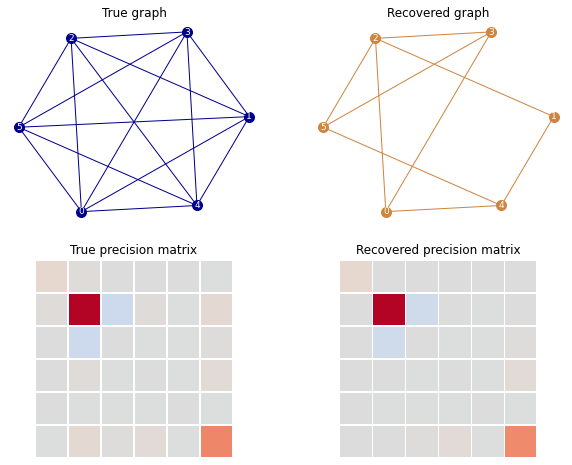

In [18]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(10,8))
node_size = 100
font_size = 9

nx.draw_networkx(G, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", \
                 font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,0])
axs[0,0].axis('off')
axs[0,0].set_title("True graph")

G1 = nx.from_numpy_array(P.solution.adjacency_)
nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,1])
axs[0,1].axis('off')
axs[0,1].set_title("Recovered graph")

sns.heatmap(Theta, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")

sns.heatmap(sol, cmap = "coolwarm", vmin = -0.5, vmax = 0.5, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")

In [23]:
# X = cars[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
#        'Acceleration']]

In [19]:
sol

array([[ 3.87568091e-02,  0.00000000e+00,  3.04912057e-04,
         1.48026290e-03,  2.07958772e-04, -0.00000000e+00],
       [ 0.00000000e+00,  3.41725184e+00, -4.86968945e-02,
         0.00000000e+00, -5.56046901e-04,  0.00000000e+00],
       [ 3.04912057e-04, -4.86968945e-02,  1.64289024e-03,
        -4.15488808e-04, -7.64175496e-05,  4.33639141e-03],
       [ 1.48026290e-03,  0.00000000e+00, -4.15488808e-04,
         3.80085120e-03, -6.78710059e-05,  1.78734082e-02],
       [ 2.07958772e-04, -5.56046901e-04, -7.64175496e-05,
        -6.78710059e-05,  1.44247729e-05, -8.11386905e-04],
       [-0.00000000e+00,  0.00000000e+00,  4.33639141e-03,
         1.78734082e-02, -8.11386905e-04,  2.86756248e-01]])

In [20]:
gglasso_result = sol

# Comparing Results

In [21]:
sklearn_result

array([[ 3.88537960e-02,  0.00000000e+00,  3.06303652e-04,
         1.48356332e-03,  2.08414110e-04, -0.00000000e+00],
       [ 0.00000000e+00,  3.42541982e+00, -4.88140426e-02,
         0.00000000e+00, -5.57403882e-04,  0.00000000e+00],
       [ 3.06303652e-04, -4.88140426e-02,  1.64692636e-03,
        -4.16669231e-04, -7.66006558e-05,  4.34621569e-03],
       [ 1.48356332e-03,  0.00000000e+00, -4.16669231e-04,
         3.81016527e-03, -6.80239843e-05,  1.79152316e-02],
       [ 2.08414110e-04, -5.57403882e-04, -7.66006558e-05,
        -6.80239843e-05,  1.44593591e-05, -8.13229833e-04],
       [-0.00000000e+00,  0.00000000e+00,  4.34621569e-03,
         1.79152316e-02, -8.13229833e-04,  2.87439716e-01]])

In [22]:
gglasso_result

array([[ 3.87568091e-02,  0.00000000e+00,  3.04912057e-04,
         1.48026290e-03,  2.07958772e-04, -0.00000000e+00],
       [ 0.00000000e+00,  3.41725184e+00, -4.86968945e-02,
         0.00000000e+00, -5.56046901e-04,  0.00000000e+00],
       [ 3.04912057e-04, -4.86968945e-02,  1.64289024e-03,
        -4.15488808e-04, -7.64175496e-05,  4.33639141e-03],
       [ 1.48026290e-03,  0.00000000e+00, -4.15488808e-04,
         3.80085120e-03, -6.78710059e-05,  1.78734082e-02],
       [ 2.07958772e-04, -5.56046901e-04, -7.64175496e-05,
        -6.78710059e-05,  1.44247729e-05, -8.11386905e-04],
       [-0.00000000e+00,  0.00000000e+00,  4.33639141e-03,
         1.78734082e-02, -8.11386905e-04,  2.86756248e-01]])

### We are getting the nearly same result from both the packages